## This is a portfolio project exploring relationship between life expectancy and GDP of six countries.

### Introduction
This project will investigate whethere there is a strong correlation between a country and the life expectancy of its citizens.

Here are some questions that this project will seek to answer:
- Has life expectancy increased over time in the six countries?
- Has GDP increase over time in the six countries?
- Is there a correlation between life expectancy and GDP of a country?
- What is the average life expectancy in these countries?

### Input Python modules

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

In [4]:
life = pd.read_csv('all_data.csv')
life.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Check the shape of `life` is performed. It seems to have 96 observations (rows) and 4 columns in the dataset.

In [5]:
life.shape

(96, 4)

### Explore the Data
First, exploring about the countries represented in `life`. The six countries are Chile, China, Germany, Mexico, United States of America, and Zimbabwe.

In [6]:
print(life.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


### Cleaning the Data
The columns name are not consistent. Rename the column `Life expectancy at birth (years)` to `LEABY`.

In [7]:
life=life.rename({'Life expectancy at birth (years)':'LEABY'}, axis=1)
life.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Check if there is any missing values in the dataset.

In [8]:
life.isnull().sum()

Country    0
Year       0
LEABY      0
GDP        0
dtype: int64

The data does not groupby country. Reformat the data by countries and find the average of `LEABY` and `GDP`.

In [9]:
lifeC=life.drop('Year', axis=1).groupby('Country').mean().reset_index()
lifeC

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Visualize the data of `Country` vs. `LEABY` by plotting.
All of the countries except Zimbabwe have life expectancy values in mid to high 70s.

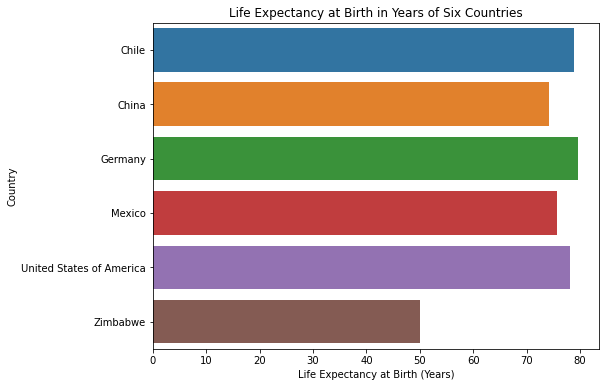

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x='LEABY', y='Country', data=lifeC)
plt.xlabel('Life Expectancy at Birth (Years)')
plt.title('Life Expectancy at Birth in Years of Six Countries')
plt.show()

Plot `Country` and `GPD` across the six countries. 

In this barplot, Zimbabwe is not even visible while Chile is barely seen. The United States of America has a much larger GDP comparing to the rest of five countries.

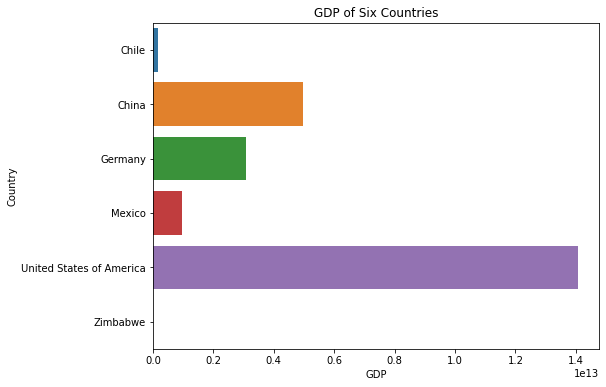

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x='GDP', y='Country', data=lifeC)
plt.title('GDP of Six Countries')
plt.show()

### Line Charts
#### Life expectancy 
Now, explore `LEABY` vs. `Year` through line chart. Each country essentially has an increase in life expectancy throughout the years. Zimbabwe has the greatest increase after a slight dip around 2004. 

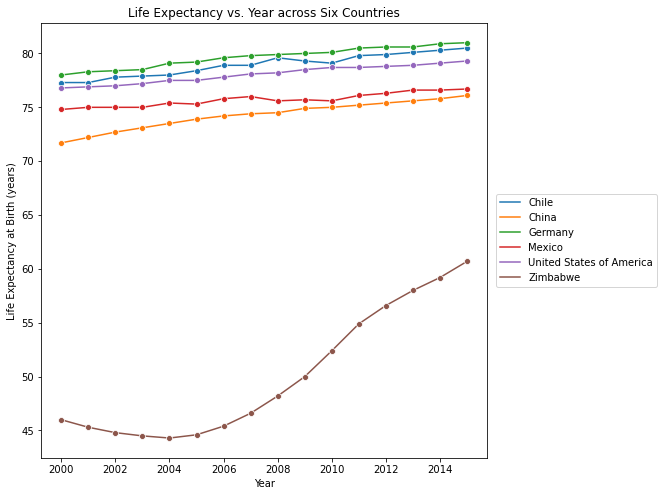

In [12]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Year', y='LEABY', data=life, hue='Country', marker='o')
plt.ylabel('Life Expectancy at Birth (years)')
plt.title('Life Expectancy vs. Year across Six Countries')
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

Look at the other aspect for each individual country regarding life expectancy. The charts below show that Chile and Mexico have deficiency in life expectancy around 2008-2010 while Zimbabwe has decrease between 2000-2004. The remaining countries has increasing life expectancy over the years. 

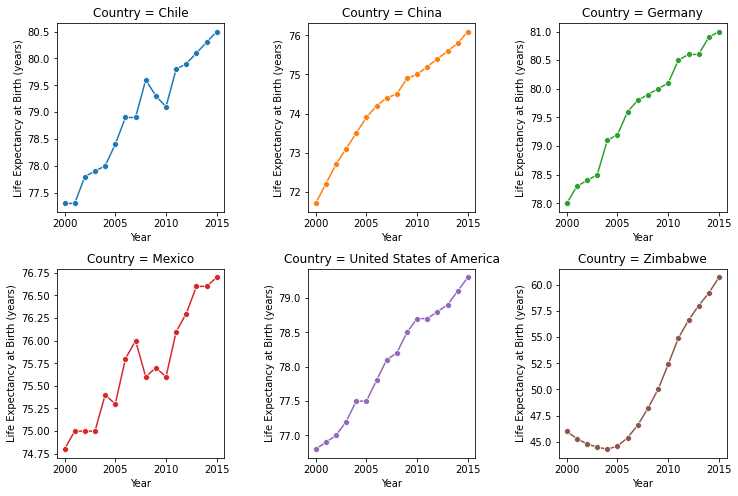

In [13]:
plt.figure(figsize=(12,8))
count=1
colorlist=['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown']

for column in life.Country.unique():
    plt.subplot(2,3,count)
    sns.lineplot(x='Year', y='LEABY', data=life[life.Country==column], marker='o', color=colorlist[count-1])
    plt.ylabel('Life Expectancy at Birth (years)')
    plt.title('Country = {}'.format(column))
    count+=1
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

#### GDP
Explore the `GDP` vs. `Year` through line charts. Below are GDP over years from 2000 to 2015 in those countries. This line plot indicates that the US and China have substantial gain in 2000-2015 whereas the rest of the countries do not have gain in this magnitude.

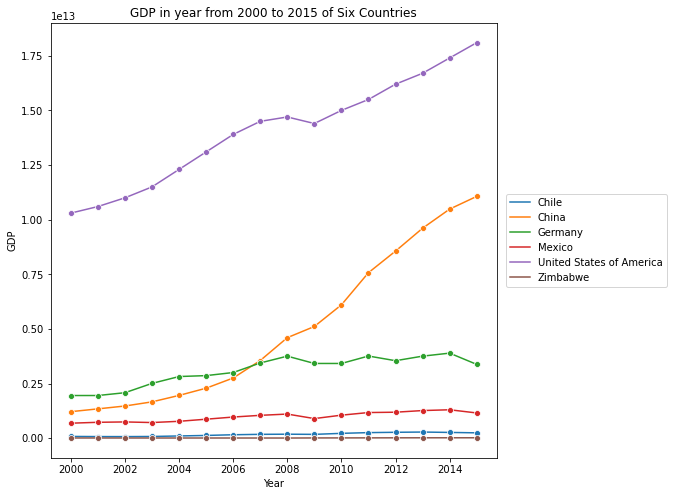

In [14]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Year', y='GDP', data=life, hue='Country', marker='o')
plt.title('GDP in year from 2000 to 2015 of Six Countries')
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

To see more in depth of the gains, the data will be used to graphing individual line plots by country. Each individual plot below shows increasing growth in general.

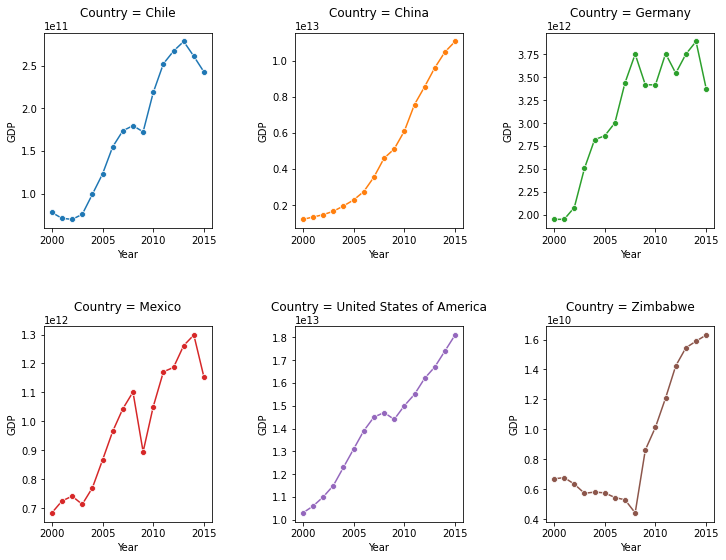

In [15]:
plt.figure(figsize=(12,9))
count=1
colorlist=['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown']

for column in life.Country.unique():
    plt.subplot(2,3,count)
    sns.lineplot(x='Year', y='GDP', data=life[life.Country==column], marker='o', color=colorlist[count-1])
    plt.title('Country = {}'.format(column), y=1.05)
    count+=1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### Scatterplot
The next two charts explore whether there is a relationship between `LEABY` and `GDP`. GDP of Zimbabwe stays flat while its life expectancy increases. The remaining countries have increasing GDP and life expectancy in different magnitude. 

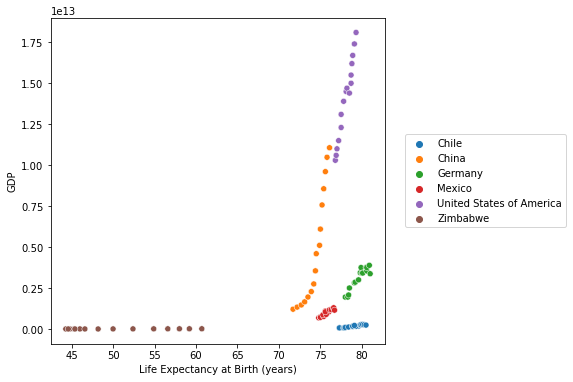

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='LEABY', y='GDP', data=life, hue='Country').legend(loc='center', bbox_to_anchor=(1.3, 0.5))
plt.xlabel('Life Expectancy at Birth (years)')
plt.show()

The individual plots below show that Germany, Mexico, and the US have linear relationships between GDP and life expectancy. In general, these countries exhibit positive correlation between GDP and life expectancy.

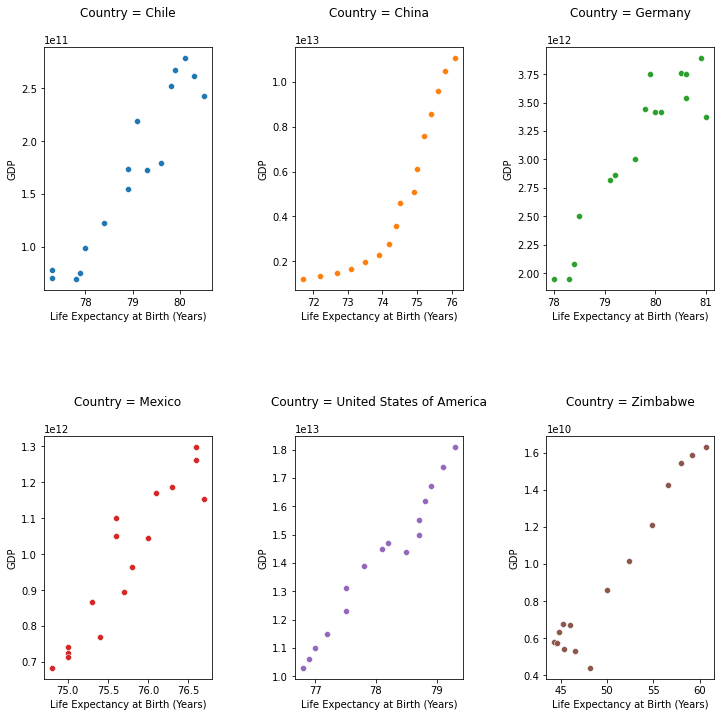

In [17]:
plt.figure(figsize=(12,9))
count=1
colorlist=['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown']

for column in life.Country.unique():
    plt.subplot(2,3,count)
    sns.scatterplot(x='LEABY', y='GDP', data=life[life.Country==column], color=colorlist[count-1])
    count+=1
    plt.xlabel('Life Expectancy at Birth (Years)')
    plt.title('Country = {}'.format(column), y=1.1)
plt.subplots_adjust(top=1.1, wspace=0.5, hspace=0.6)


## Conclusion

This project was able to make some data visualization with the data.

Also, the project could asnwer the questions posed in the beginning:
- What is the average life expectancy in these countries?
    - All the countries except Zimbabwe have average life expectancy value at mid to high 70s while Zimbabwe stays around 50 years.
- Has life expectancy increased over time in the six countries?
    - There are increasing life expectany in general over the years.
- Has GDP increase over time in the six countries?
    - All of the six countries have GDP in growth. In comparesion, the US and China have the greatest growth in GDP throughout the years.
- Is there a correlation between life expectancy and GDP of a country?
    - In general, all of the six countries have positive correlation between life expectancy and GDP. The data also exhibits that Germany, Mexico, and the US have linear relationship between life expectancy and GDP.
